# In this Notebook we will Explore, Clean, and Analyse our datasets. 
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data= pd.read_csv("C:/Users/Fawzi/Desktop/bank/bank-full.csv", delimiter=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [5]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [6]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [8]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

### Filter the data on duration > 0

In [9]:
(data['duration']==0).value_counts()

False    45208
True         3
Name: duration, dtype: int64

In [10]:
data=data[data['duration']>0]

In [11]:
(data['duration']==0).value_counts()

False    45208
Name: duration, dtype: int64

### Analysing the "pdays" feature

In [12]:
(data['pdays']==-1).value_counts()
# we have 36954 customers have been contacted for the first time

True     36951
False     8257
Name: pdays, dtype: int64

In [13]:
data = data.replace('unknown', np.nan)

In [14]:
data.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13019
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36956
y                0
dtype: int64

In [15]:
data['poutcome'].unique()

array([nan, 'failure', 'other', 'success'], dtype=object)

In [16]:
data_cl=data.dropna(axis=0)

In [17]:
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   job        7842 non-null   object
 2   marital    7842 non-null   object
 3   education  7842 non-null   object
 4   default    7842 non-null   object
 5   balance    7842 non-null   int64 
 6   housing    7842 non-null   object
 7   loan       7842 non-null   object
 8   contact    7842 non-null   object
 9   day        7842 non-null   int64 
 10  month      7842 non-null   object
 11  duration   7842 non-null   int64 
 12  campaign   7842 non-null   int64 
 13  pdays      7842 non-null   int64 
 14  previous   7842 non-null   int64 
 15  poutcome   7842 non-null   object
 16  y          7842 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


we left of by 7840 observations from 45210 

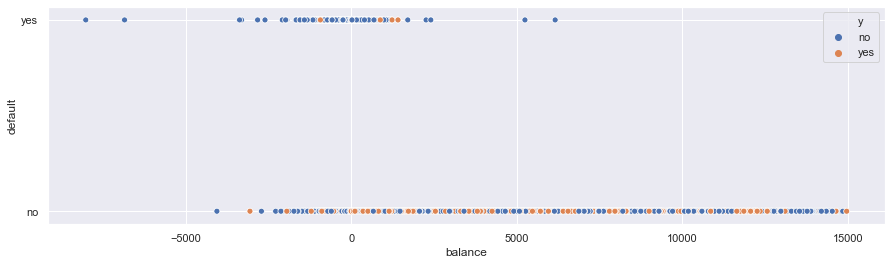

In [18]:
plt.figure(figsize=(15,4))
sns.scatterplot(y='default',x='balance',  data=data[data['balance']<15000], hue='y')

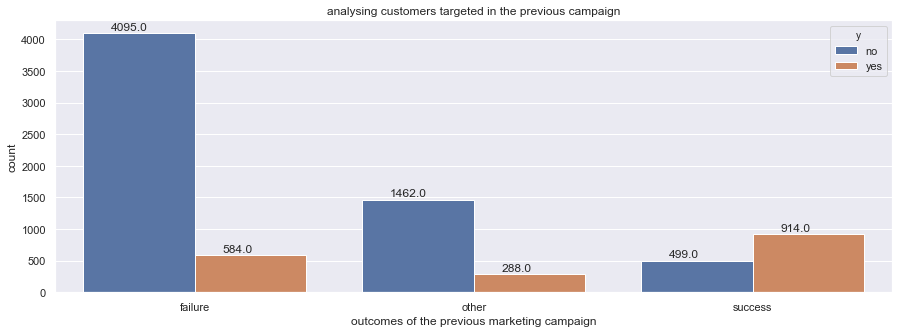

In [19]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x=data_cl['poutcome'],hue=data_cl['y'])
plt.xlabel("outcomes of the previous marketing campaign")
plt.title("analysing customers targeted in the previous campaign")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
#failure: 12.5%                     success: 65%

In [20]:
print(584/(584+4095))
914/(914+499)

0.12481299422953622


0.6468506723283793

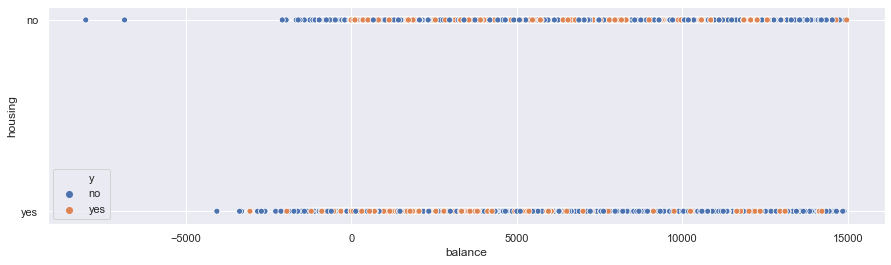

In [21]:
plt.figure(figsize=(15,4))
sns.scatterplot(y='housing',x='balance',  data=data[data['balance']<15000], hue='y')

#### Dropping the "poutcome" and then drop the missing values

In [22]:
data_cl1=data.drop(data[['poutcome']],axis=1)
data_cl1=data_cl1.dropna(axis=0)
data_cl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30905 entries, 12657 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        30905 non-null  int64 
 1   job        30905 non-null  object
 2   marital    30905 non-null  object
 3   education  30905 non-null  object
 4   default    30905 non-null  object
 5   balance    30905 non-null  int64 
 6   housing    30905 non-null  object
 7   loan       30905 non-null  object
 8   contact    30905 non-null  object
 9   day        30905 non-null  int64 
 10  month      30905 non-null  object
 11  duration   30905 non-null  int64 
 12  campaign   30905 non-null  int64 
 13  pdays      30905 non-null  int64 
 14  previous   30905 non-null  int64 
 15  y          30905 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


#### Exploring the bank additional dataset

In [23]:
data_add=pd.read_csv('C:/Users/Fawzi/Desktop/bank-additional/bank-additional/bank-additional-full.csv',delimiter=";", na_values=["unknown","nonexistent"])

In [24]:
# data_add == bank_additional
data_add.isnull().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [25]:
(data_add['duration']==0).value_counts()

False    41184
True         4
Name: duration, dtype: int64

In [26]:
data_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [27]:
data_add_cl=data_add.dropna(axis=0)
data_add_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4652 entries, 24019 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4652 non-null   int64  
 1   job             4652 non-null   object 
 2   marital         4652 non-null   object 
 3   education       4652 non-null   object 
 4   default         4652 non-null   object 
 5   housing         4652 non-null   object 
 6   loan            4652 non-null   object 
 7   contact         4652 non-null   object 
 8   month           4652 non-null   object 
 9   day_of_week     4652 non-null   object 
 10  duration        4652 non-null   int64  
 11  campaign        4652 non-null   int64  
 12  pdays           4652 non-null   int64  
 13  previous        4652 non-null   int64  
 14  poutcome        4652 non-null   object 
 15  emp.var.rate    4652 non-null   float64
 16  cons.price.idx  4652 non-null   float64
 17  cons.conf.idx   4652 non-nul

In [28]:
data_add_cl1=data_add.drop(data_add[['poutcome']],axis=1)
data_add_cl1=data_add_cl1.dropna(axis=0)
data_add_cl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  emp.var.rate    30488 non-null  float64
 15  cons.price.idx  30488 non-null  float64
 16  cons.conf.idx   30488 non-null  float64
 17  euribor3m       30488 non-null 

###  Exploring and Preprocessing the bank_full dataset
    For a Logistic Regression modeling

In [29]:
data_cl1.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
count,30905.000000,30905,30905,30905,30905,30905.000000,30905,30905,30905,30905.000000,30905,30905.000000,30905.000000,30905.000000,30905.000000,30905
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,jul,NaN,NaN,NaN,NaN,no
freq,NaN,7329,18377,16002,30395,NaN,15563,25786,28211,NaN,6336,NaN,NaN,NaN,NaN,26392
mean,40.919431,NaN,NaN,NaN,NaN,1425.668630,NaN,NaN,NaN,15.967093,NaN,260.501861,2.750946,55.948520,0.808542,NaN
std,10.922739,NaN,NaN,NaN,NaN,3190.976569,NaN,NaN,NaN,8.226756,NaN,257.783787,2.953683,112.729647,2.706249,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,-1.000000,0.000000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,473.000000,NaN,NaN,NaN,16.000000,NaN,181.000000,2.000000,-1.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1502.000000,NaN,NaN,NaN,21.000000,NaN,322.000000,3.000000,10.000000,1.000000,NaN


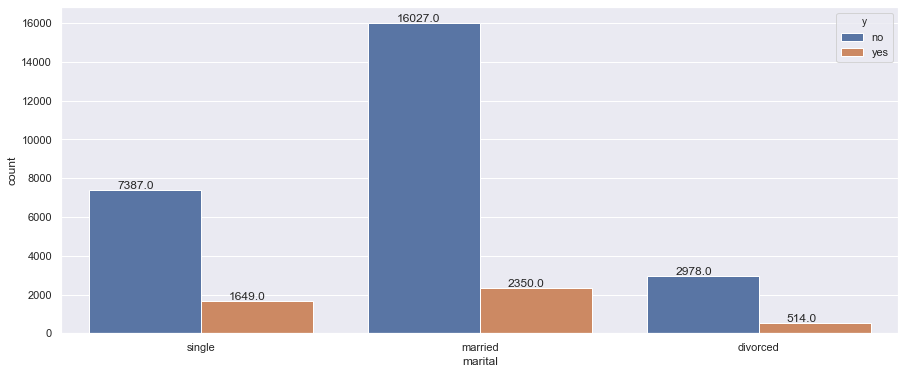

In [30]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='marital',  data=data_cl1, hue='y')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

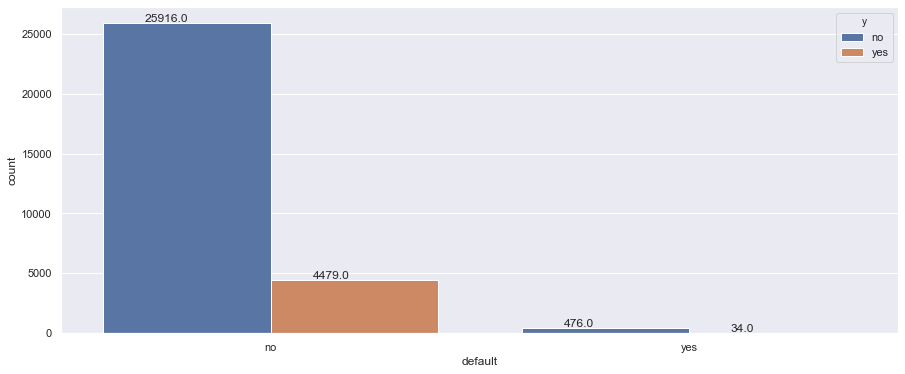

In [31]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='default',  data=data_cl1, hue='y')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        
# this barplot below shows the number of subscribed against the default feature. As we can see the people who have credit in default won't subscribed for a term deposit.

In [32]:
4479/25918

0.17281426035959566

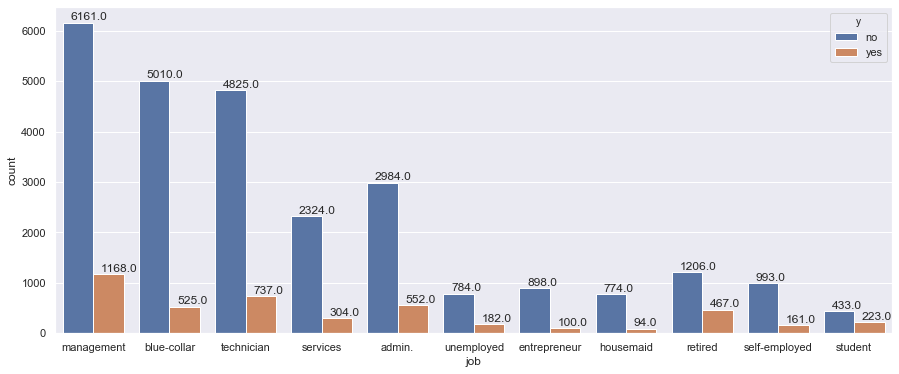

In [33]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='job',  data=data_cl1, hue='y')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        
# here we can notice that we have about between  of people from different jobs subscribed for a term deposit. Except"students"

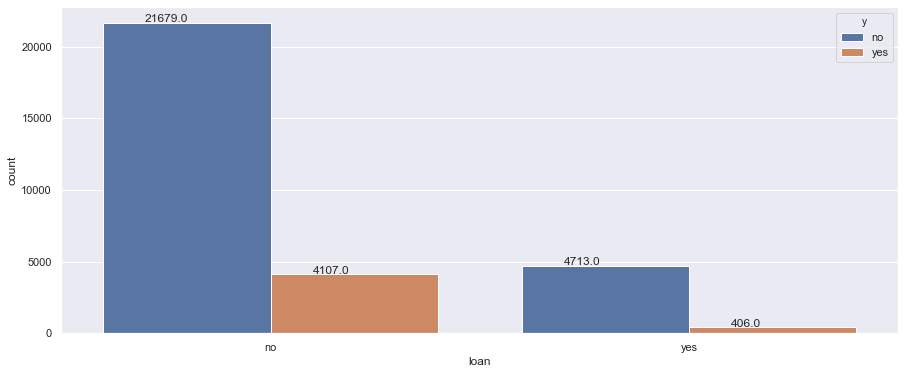

In [34]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='loan',  data=data_cl1, hue='y')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [35]:
print(406/5100)
print(4107/26000)

0.0796078431372549
0.15796153846153846


### Dealing with outliers:

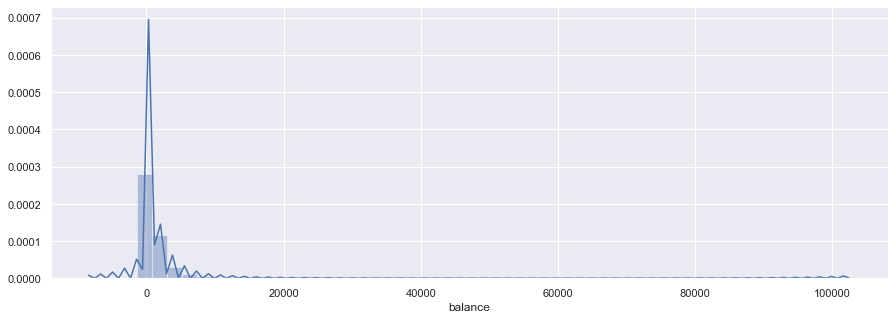

In [36]:
plt.figure(figsize=(15,5))
sns.distplot(data_cl1['balance'])

In [37]:
data_cl1['balance'].describe(percentiles=[0.1,0.2,0.3,0.5,0.75,0.8,0.9,0.95])

count     30905.000000
mean       1425.668630
std        3190.976569
min       -8019.000000
10%           0.000000
20%          27.000000
30%         140.000000
50%         473.000000
75%        1502.000000
80%        1959.200000
90%        3717.000000
95%        5969.000000
max      102127.000000
Name: balance, dtype: float64

In [38]:
q=data_cl1['balance'].quantile(0.99)
q

13711.0

In [39]:
in_debt=data_cl1[data_cl1['balance']<0]
in_debt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 12662 to 44908
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        2224 non-null   int64 
 1   job        2224 non-null   object
 2   marital    2224 non-null   object
 3   education  2224 non-null   object
 4   default    2224 non-null   object
 5   balance    2224 non-null   int64 
 6   housing    2224 non-null   object
 7   loan       2224 non-null   object
 8   contact    2224 non-null   object
 9   day        2224 non-null   int64 
 10  month      2224 non-null   object
 11  duration   2224 non-null   int64 
 12  campaign   2224 non-null   int64 
 13  pdays      2224 non-null   int64 
 14  previous   2224 non-null   int64 
 15  y          2224 non-null   object
dtypes: int64(7), object(9)
memory usage: 295.4+ KB


In [40]:
in_debt['y'].value_counts()

no     2064
yes     160
Name: y, dtype: int64

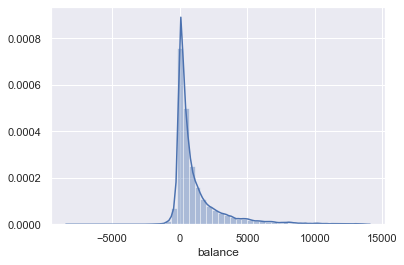

In [41]:
b1=data_cl1[data_cl1['balance']<q]
sns.distplot(b1['balance'])

In [42]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30594 entries, 12657 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        30594 non-null  int64 
 1   job        30594 non-null  object
 2   marital    30594 non-null  object
 3   education  30594 non-null  object
 4   default    30594 non-null  object
 5   balance    30594 non-null  int64 
 6   housing    30594 non-null  object
 7   loan       30594 non-null  object
 8   contact    30594 non-null  object
 9   day        30594 non-null  int64 
 10  month      30594 non-null  object
 11  duration   30594 non-null  int64 
 12  campaign   30594 non-null  int64 
 13  pdays      30594 non-null  int64 
 14  previous   30594 non-null  int64 
 15  y          30594 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [43]:
q_d=data_cl1['duration'].quantile(0.99)
q_d

1274.8799999999974

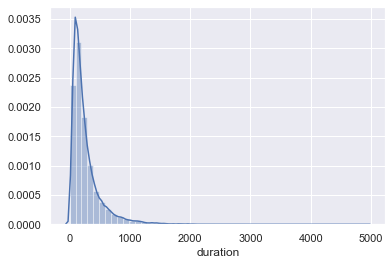

In [44]:
sns.distplot(data_cl1['duration'])

In [45]:
b1=b1[b1['duration']<q_d]
b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30289 entries, 12657 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        30289 non-null  int64 
 1   job        30289 non-null  object
 2   marital    30289 non-null  object
 3   education  30289 non-null  object
 4   default    30289 non-null  object
 5   balance    30289 non-null  int64 
 6   housing    30289 non-null  object
 7   loan       30289 non-null  object
 8   contact    30289 non-null  object
 9   day        30289 non-null  int64 
 10  month      30289 non-null  object
 11  duration   30289 non-null  int64 
 12  campaign   30289 non-null  int64 
 13  pdays      30289 non-null  int64 
 14  previous   30289 non-null  int64 
 15  y          30289 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.9+ MB


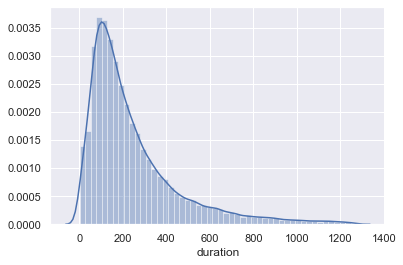

In [46]:
sns.distplot(b1['duration'])

#### campaign & previous"
   ##### are 2 discrete variables represent the number of contacts performed during and before the campaign for this client

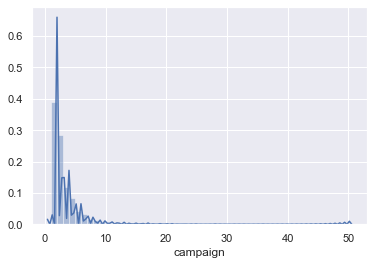

In [47]:
sns.distplot(b1['campaign'])

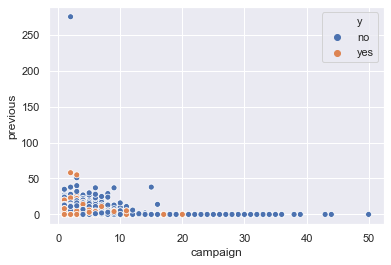

In [48]:
sns.scatterplot(x='campaign', y='previous', data=b1, hue='y')

In [49]:
b1['previous'].describe(percentiles=[0.1, 0.25, 0.5 ,0.75 ,0.8,0.9,0.95,0.99])

count    30289.000000
mean         0.811615
std          2.717986
min          0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
80%          1.000000
90%          3.000000
95%          4.000000
99%         10.000000
max        275.000000
Name: previous, dtype: float64

In [50]:
b1=b1[b1['previous']< 200]

In [51]:
b1['campaign'].describe()

count    30288.000000
mean         2.750231
std          2.955071
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         50.000000
Name: campaign, dtype: float64

In [52]:
q_c=data_cl1['campaign'].quantile(0.99)
q_c

16.0

In [53]:
b1=b1[b1['campaign']<q_c]
b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29967 entries, 12657 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        29967 non-null  int64 
 1   job        29967 non-null  object
 2   marital    29967 non-null  object
 3   education  29967 non-null  object
 4   default    29967 non-null  object
 5   balance    29967 non-null  int64 
 6   housing    29967 non-null  object
 7   loan       29967 non-null  object
 8   contact    29967 non-null  object
 9   day        29967 non-null  int64 
 10  month      29967 non-null  object
 11  duration   29967 non-null  int64 
 12  campaign   29967 non-null  int64 
 13  pdays      29967 non-null  int64 
 14  previous   29967 non-null  int64 
 15  y          29967 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.9+ MB


In [54]:
b1['campaign'].describe()

count    29967.000000
mean         2.547235
std          2.137149
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: campaign, dtype: float64

#### Examining month and day features:

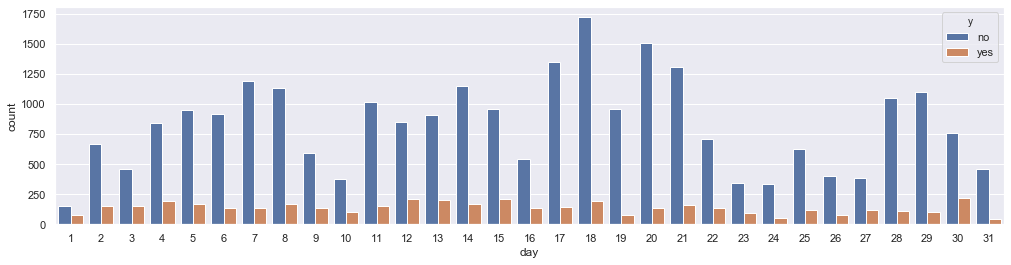

In [55]:
plt.figure(figsize=(17,4))
sns.countplot(x='day',data=b1, hue='y')

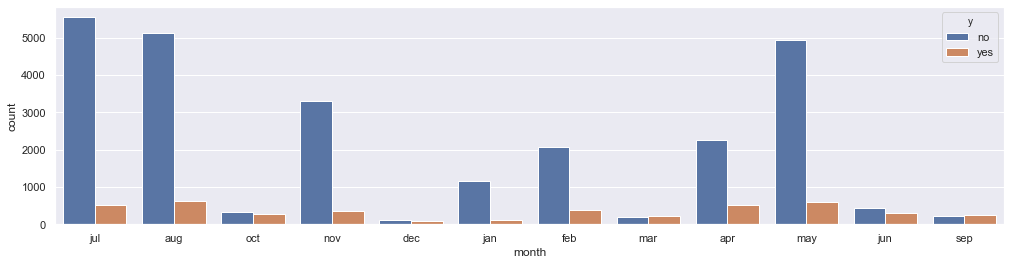

In [56]:
plt.figure(figsize=(17,4))
sns.countplot(x='month',data=b1, hue='y')
## I think that the month feature is more imprtant than the day features as it contributes more to the dependant  

In [57]:
b1['month']=b1['month'].map({'jan':1, 'feb':2, 'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [58]:
## Creating a checkpoint for the data we will preprocess to be fitted into the RandomForest Model
RF_data=b1.copy()

### pdays

In [59]:
b1['pdays'].describe()

count    29967.000000
mean        56.840358
std        113.423722
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         47.500000
max        871.000000
Name: pdays, dtype: float64

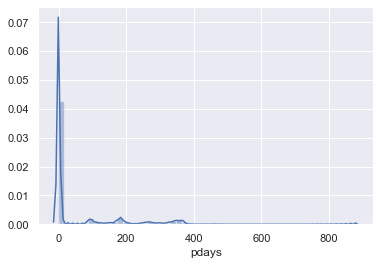

In [60]:
sns.distplot(b1['pdays'])

In [61]:
x1=b1[b1['pdays']==-1]
x1['y'].value_counts()

no     19718
yes     2530
Name: y, dtype: int64

In [62]:
b1['y'].value_counts()

no     25699
yes     4268
Name: y, dtype: int64

In [63]:
onetime=b1[b1['campaign']==1]
onetime['y'].value_counts()
# from the subscribed (y=yes) we have about 50% accept from the first time of contact

no     9463
yes    2139
Name: y, dtype: int64

#### Analysing "contact" feature

In [64]:
b1['contact'].value_counts()

cellular     27391
telephone     2576
Name: contact, dtype: int64

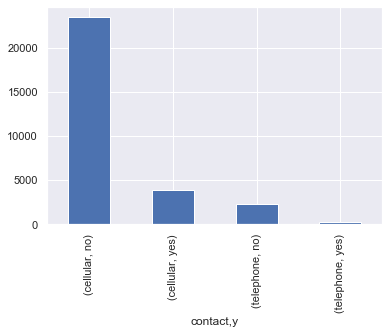

In [65]:
b1.groupby(['contact'])['y'].value_counts().plot(kind='bar')

In [66]:
print(3953/27671, 'cellular')
print(323/2620, 'telephone')
# dummies

0.14285714285714285 cellular
0.12328244274809161 telephone


### dealing with binary features (default, housing, loan)

In [68]:
b1['housing'].unique()

array(['no', 'yes'], dtype=object)

In [69]:
b1['housing']=b1['housing'].map({'yes':1, 'no':0})
b1['housing'].describe()

count    29967.000000
mean         0.498582
std          0.500006
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: housing, dtype: float64

In [70]:
b1['default'].value_counts()

no     29473
yes      494
Name: default, dtype: int64

In [71]:
b1['default']=b1['default'].map({'yes':1, 'no':0})

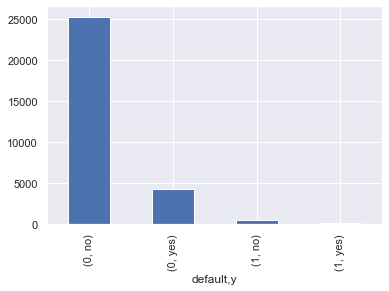

In [72]:
b1.groupby(['default'])['y'].value_counts().plot(kind='bar')

In [73]:
b1['loan'].value_counts()

no     24985
yes     4982
Name: loan, dtype: int64

In [74]:
b1['loan']=b1['loan'].map({'yes':1, 'no':0})

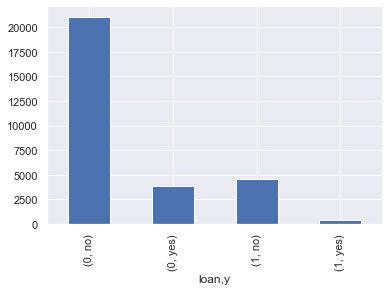

In [75]:
b1.groupby(['loan'])['y'].value_counts().plot(kind='bar')

#### Analyzing "marital" feature:

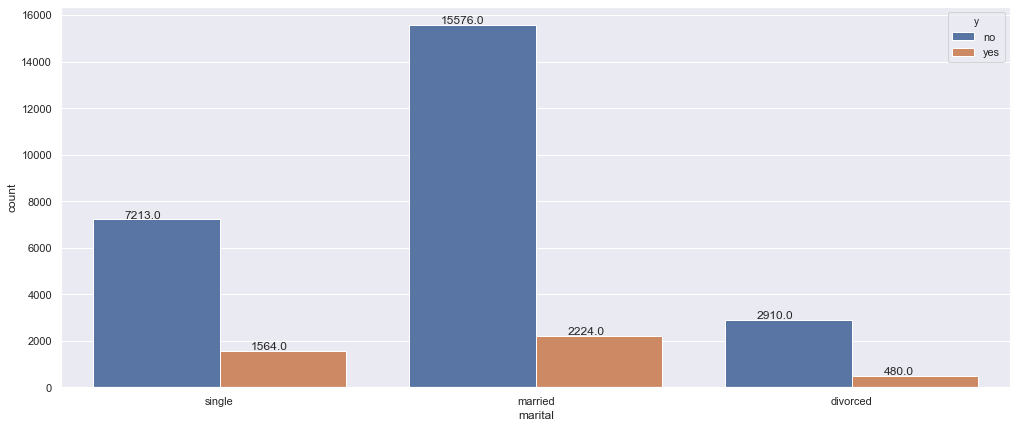

In [76]:
plt.figure(figsize=(17,7))
ax=sns.countplot(x='marital',  data=b1, hue='y')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

#### Analysing  "education" feature:

In [77]:
b1['education'].value_counts()

secondary    15589
tertiary     10220
primary       4158
Name: education, dtype: int64

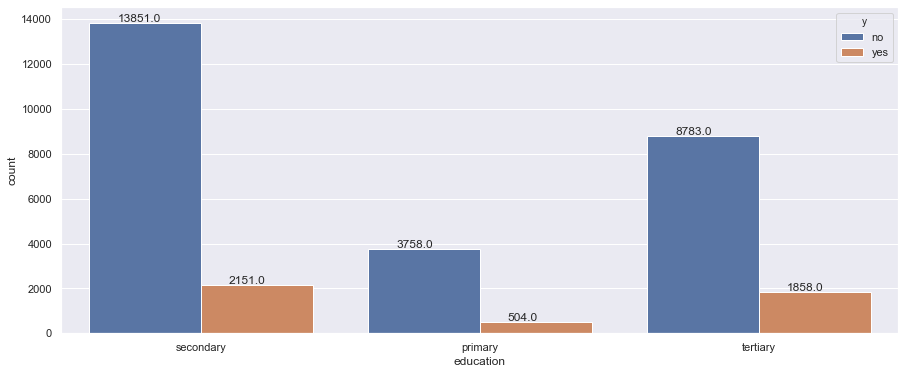

In [78]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='education',  data=data_cl1, hue='y')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [79]:
print((504+2150)/(3758+13851))
print(1858/(8783+1858))

0.15071838264523824
0.17460764965698714


### Analysing "job" feature:

In [80]:
b1['job'].value_counts()

management       7039
blue-collar      5404
technician       5385
admin.           3462
services         2565
retired          1614
self-employed    1112
entrepreneur      965
unemployed        926
housemaid         849
student           646
Name: job, dtype: int64

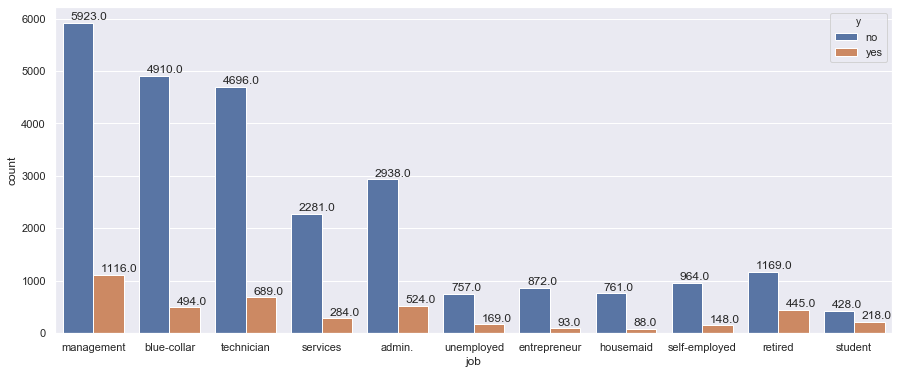

In [81]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='job',  data=b1, hue='y')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

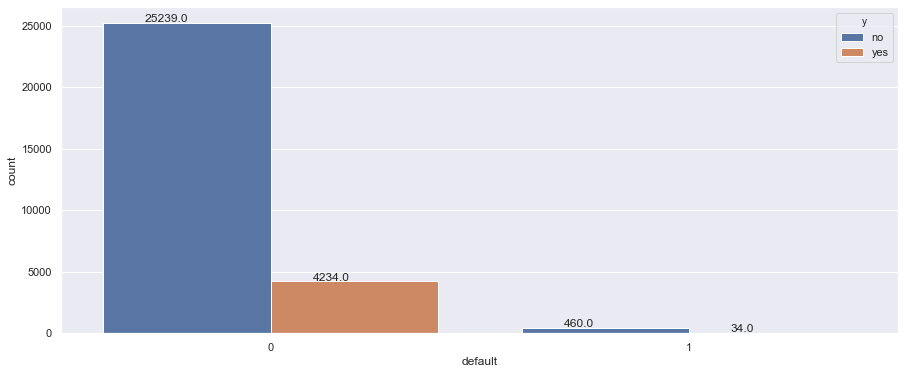

In [82]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='default',  data=b1, hue='y')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## Age Analysis

In [83]:
data_cl1['age'].describe()

count    30905.000000
mean        40.919431
std         10.922739
min         18.000000
25%         32.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [84]:
data_cl1[data_cl1['age']>93].groupby('y')['age'].count()

y
no     2
yes    1
Name: age, dtype: int64

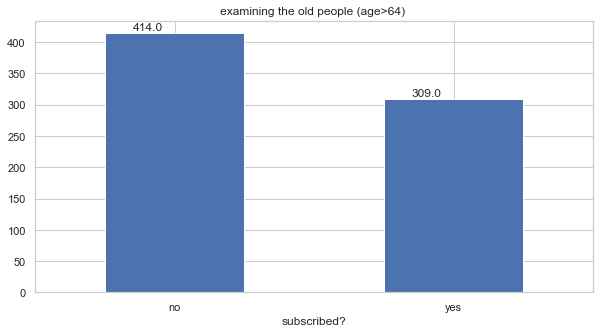

In [85]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
ax=data_cl1[data_cl1['age']>64].groupby('y')['age'].count().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("subscribed?")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
plt.title("examining the old people (age>64) ")
plt.show()

In [86]:
309/(309+414)

0.42738589211618255

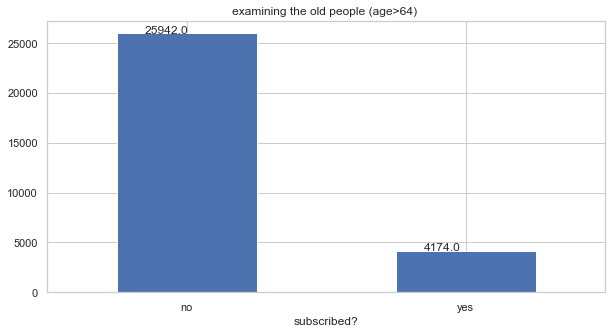

In [87]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
ax=data_cl1[data_cl1['age']<64].groupby('y')['age'].count().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("subscribed?")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
plt.title("examining the old people (age>64) ")
plt.show()

In [88]:
4174/(4174+25942)

0.13859742329658653

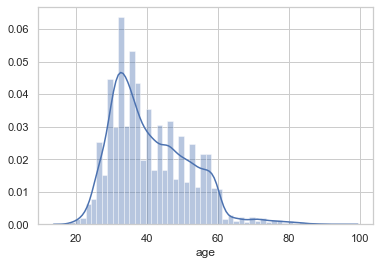

In [89]:
sns.distplot(data_cl1['age'])

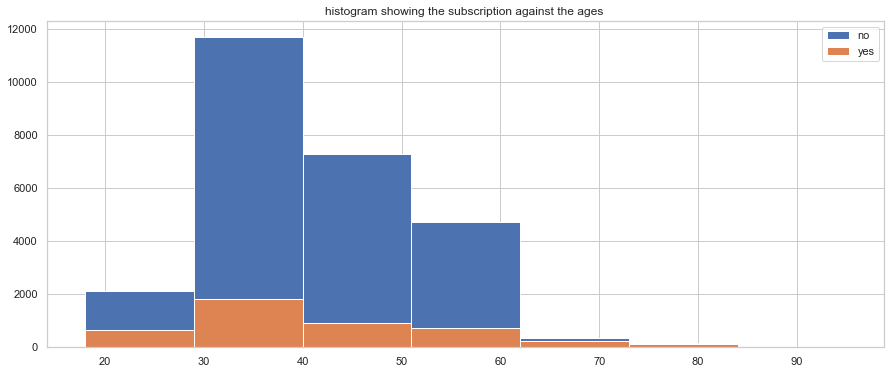

In [90]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
plt.title("histogram showing the subscription against the ages ")
data_cl1[data_cl1['y']=="no"]["age"].hist(bins=7 )
data_cl1[data_cl1['y']=="yes"]["age"].hist(bins=7 )
plt.legend(["no", "yes"])
plt.show()